## Now lets train the text classifier

In [1]:
import numpy as np
import pandas as pd
from fastai.text.all import *
import torch

In [2]:
# Read the classifier data
fastai_text_classifier_data = torch.load(r"..\classifier_data.pkl")

In [3]:
# Set the batch size to 16 
fastai_text_classifier_data.bs = 16

In [4]:
fastai_text_classifier_data.show_batch(max_n=3)

,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,xxbos xxrep 4 ? xxrep 9 ? ? ? 200 xxup ml xxrep 4 ? ? ? xxrep 5 ? xxrep 4 ? 100 ? ? . ? ? xxrep 4 ? xxrep 4 ? xxrep 5 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 6 ? ? ? xxrep 4 ? ? ? xxrep 3 ? xxrep 6 ? xxrep 3 ? xxrep 7 ? ? ? xxrep 6 ? 30 xxrep 3 ? 2020 ? ? xxrep 4 ? xxrep 3 ? xxrep 3 ? xxrep 4 ? xxrep 7 ? 3 / 3 \r\r\n @drharshvardhan \r\r\n @narendramodi # indiafightscorona,Neutral
2,xxbos xxup ww - ii xxmaj crisis . \r\r\n xxmaj in xxunk : xxmaj churchill xxunk xxmaj india 's food stock to xxmaj xxunk . \r\r\n xxmaj result : xxmaj great xxmaj bengal xxmaj famine . \r\r\n\r\r\n▁ # xxup covid__19 xxmaj crisis . \r\r\n xxmaj in 2020 : xxmaj modi xxunk xxmaj india 's medical stock to xxmaj americans . \r\r\n xxmaj result xxmaj xxunk … .. \r\r\n\r\r\n▁ # xxrep 10 ? _ ? ? _ xxrep 4 ? \r\r\n▁ # xxup pm ? ? _ xxrep 3 ? _ ? ? _ xxrep 3 ? \r\r\n▁ # xxunk,Extremely Negative


In [5]:
fastai_text_classifier_data.categorize.vocab

['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive']

In [12]:
# Premare the model
learner = text_classifier_learner(fastai_text_classifier_data, AWD_LSTM, metrics=accuracy, drop_mult=1.0)

### We will load the updated encoder that we got after training the language model

In [15]:
# Load the encoders
learner.load_encoder(r"E:\Work\Data_Science\Projects\Text_Classification_FastAI_V2\model\enc")

SuggestedLRs(valley=0.007585775572806597)

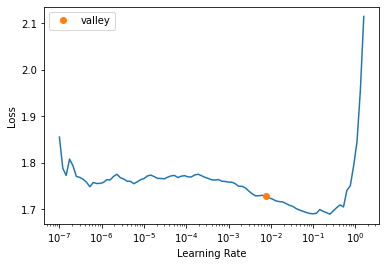

In [16]:
# Finding the best learning rate
learner.lr_find()

In [17]:
# Train the last few layers for 5 epochs
learner.fit_one_cycle(5, 0.007)

epoch,train_loss,valid_loss,accuracy,time
0,1.507396,1.411282,0.366972,01:37
1,1.493488,1.382247,0.386167,01:39
2,1.469086,1.365409,0.391674,01:40
3,1.469311,1.357372,0.397667,01:41
4,1.462625,1.359179,0.392403,01:42


SuggestedLRs(valley=0.001737800776027143)

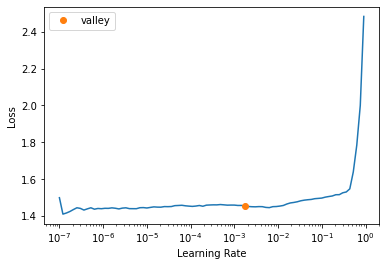

In [18]:
# Unfreeze all weights
learner.unfreeze()
learner.lr_find()

In [19]:
learner.fit_one_cycle(5, slice(0.00001, 0.01))

epoch,train_loss,valid_loss,accuracy,time
0,1.417177,1.384260,0.389406,03:01
1,1.297692,1.126556,0.509031,03:08
2,1.226985,1.036048,0.564672,03:04
3,1.168764,0.996356,0.583786,03:04
4,1.146958,0.983331,0.596015,03:04


## saving the final model

In [29]:
# learner.save (r"..\model\classifier_model.pkl", with_opt=True, pickle_protocol=2) # saving with optimizer state
learner.export(r"..\model\classifier_model.pkl")